In [1]:
import numpy as np

In [2]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [3]:
a = np.array([[10,20],[30,50]])

a_ = softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]
 [2.06115362e-09 9.99999998e-01]]


In [4]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [5]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## XOR Dataset

In [7]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

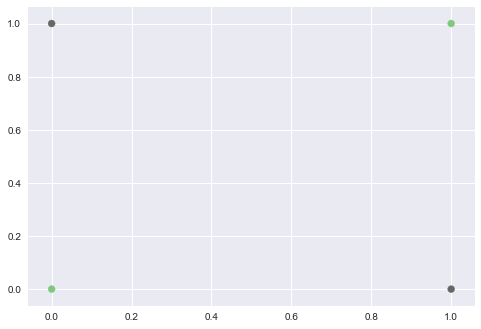

In [8]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [9]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [10]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [15]:
losses = train(X,Y,model,300,0.1)

Epoch 0 Loss 0.0878
Epoch 1 Loss 0.0792
Epoch 2 Loss 0.0718
Epoch 3 Loss 0.0655
Epoch 4 Loss 0.0601
Epoch 5 Loss 0.0553
Epoch 6 Loss 0.0512
Epoch 7 Loss 0.0476
Epoch 8 Loss 0.0444
Epoch 9 Loss 0.0416
Epoch 10 Loss 0.0391
Epoch 11 Loss 0.0368
Epoch 12 Loss 0.0348
Epoch 13 Loss 0.0330
Epoch 14 Loss 0.0313
Epoch 15 Loss 0.0298
Epoch 16 Loss 0.0284
Epoch 17 Loss 0.0271
Epoch 18 Loss 0.0260
Epoch 19 Loss 0.0249
Epoch 20 Loss 0.0239
Epoch 21 Loss 0.0230
Epoch 22 Loss 0.0221
Epoch 23 Loss 0.0213
Epoch 24 Loss 0.0206
Epoch 25 Loss 0.0199
Epoch 26 Loss 0.0192
Epoch 27 Loss 0.0186
Epoch 28 Loss 0.0180
Epoch 29 Loss 0.0175
Epoch 30 Loss 0.0170
Epoch 31 Loss 0.0165
Epoch 32 Loss 0.0160
Epoch 33 Loss 0.0156
Epoch 34 Loss 0.0152
Epoch 35 Loss 0.0148
Epoch 36 Loss 0.0144
Epoch 37 Loss 0.0141
Epoch 38 Loss 0.0137
Epoch 39 Loss 0.0134
Epoch 40 Loss 0.0131
Epoch 41 Loss 0.0128
Epoch 42 Loss 0.0125
Epoch 43 Loss 0.0122
Epoch 44 Loss 0.0120
Epoch 45 Loss 0.0117
Epoch 46 Loss 0.0115
Epoch 47 Loss 0.0113
Ep

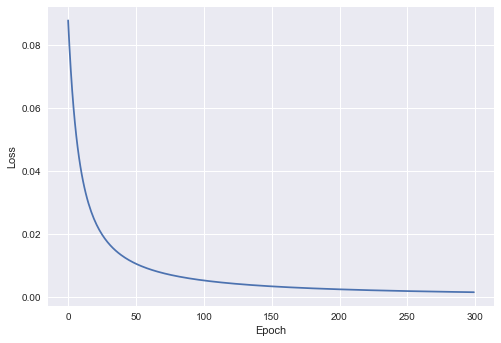

In [16]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
## Find Accuracy
from visualize import plot_decision_boundary

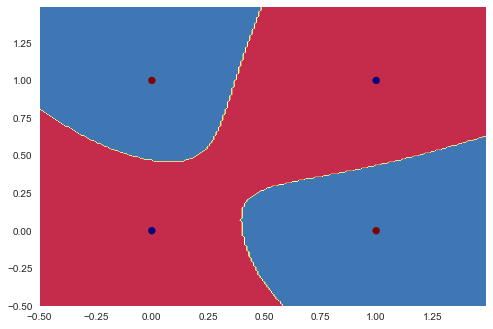

In [18]:

plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [60]:
outputs = model.predict(X)

In [61]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 100.0000
